In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("resources/census2.csv")
data.dropna(how="all")

# Success - Display the first record
display(data.head(n=5))
#display(data['education-num'].unique())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,Private,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,0,41310,0,24,Mexico,0
1,63,Self-emp-not-inc,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,0,41310,0,50,United-States,0
2,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,0,41310,0,90,South,0
3,18,Private,HS-grad,9,Never-married,Protective-serv,Own-child,White,0,34095,0,3,United-States,0
4,19,Private,HS-grad,9,Never-married,Other-service,Own-child,White,1,34095,0,20,United-States,0


In [2]:
test_data = pd.read_csv("resources/test_census2.csv")
test_data.dropna(how="all")
test_data.head()

,Unnamed: 0,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,NaN,27.0,Private,Preschool,1.0,Married-civ-spouse,Farming-fishing,Other-relative,White,0.0,41310.0,0.0,24.0,Mexico
1,NaN,63.0,Self-emp-not-inc,Masters,14.0,Married-civ-spouse,Farming-fishing,Husband,White,0.0,41310.0,0.0,50.0,United-States
2,NaN,36.0,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,0.0,41310.0,0.0,90.0,South
3,NaN,55.0,Self-emp-not-inc,HS-grad,9.0,Divorced,Exec-managerial,Not-in-family,White,0.0,34095.0,0.0,60.0,United-States
4,NaN,19.0,Private,HS-grad,9.0,Never-married,Other-service,Own-child,White,1.0,34095.0,0.0,20.0,United-States


In [3]:
pd.get_dummies(data).head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,27,1,0,41310,0,24,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,63,14,0,41310,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,36,9,0,41310,0,90,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,18,9,0,34095,0,3,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,19,9,1,34095,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [4]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,Private,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,0,41310,0,24,Mexico,0
1,63,Self-emp-not-inc,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,0,41310,0,50,United-States,0
2,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,0,41310,0,90,South,0
3,18,Private,HS-grad,9,Never-married,Protective-serv,Own-child,White,0,34095,0,3,United-States,0
4,19,Private,HS-grad,9,Never-married,Other-service,Own-child,White,1,34095,0,20,United-States,0


In [5]:
clean_data = data.drop(["relationship"], axis=1)

In [6]:
clean_data.head()

,age,workclass,education_level,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,Private,Preschool,1,Married-civ-spouse,Farming-fishing,White,0,41310,0,24,Mexico,0
1,63,Self-emp-not-inc,Masters,14,Married-civ-spouse,Farming-fishing,White,0,41310,0,50,United-States,0
2,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Asian-Pac-Islander,0,41310,0,90,South,0
3,18,Private,HS-grad,9,Never-married,Protective-serv,White,0,34095,0,3,United-States,0
4,19,Private,HS-grad,9,Never-married,Other-service,White,1,34095,0,20,United-States,0


In [7]:
clean_data.dtypes

age                 int64
workclass          object
education_level    object
education-num       int64
marital-status     object
occupation         object
race               object
sex                 int64
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder = preprocessing.LabelEncoder()
category_col = ["workclass","education_level","marital-status","occupation", "race","native-country"]
mapping_dict={}
for col in category_col:
    clean_data[col] = labelEncoder.fit_transform(clean_data[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(mapping_dict)

{'workclass': {' Federal-gov': 0, ' Local-gov': 1, ' Private': 2, ' Self-emp-inc': 3, ' Self-emp-not-inc': 4, ' State-gov': 5, ' Without-pay': 6}, 'education_level': {' 10th': 0, ' 11th': 1, ' 12th': 2, ' 1st-4th': 3, ' 5th-6th': 4, ' 7th-8th': 5, ' 9th': 6, ' Assoc-acdm': 7, ' Assoc-voc': 8, ' Bachelors': 9, ' Doctorate': 10, ' HS-grad': 11, ' Masters': 12, ' Preschool': 13, ' Prof-school': 14, ' Some-college': 15}, 'marital-status': {' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}, 'occupation': {' Adm-clerical': 0, ' Armed-Forces': 1, ' Craft-repair': 2, ' Exec-managerial': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Machine-op-inspct': 6, ' Other-service': 7, ' Priv-house-serv': 8, ' Prof-specialty': 9, ' Protective-serv': 10, ' Sales': 11, ' Tech-support': 12, ' Transport-moving': 13}, 'race': {' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 1, ' Black': 2, ' Other': 3, '

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder = preprocessing.LabelEncoder()
category_col = ["workclass","education_level","marital-status","occupation", "race","native-country"]
for col in category_col:
        clean_data[col] = labelEncoder.fit_transform(clean_data[col])

In [10]:
clean_data

,age,workclass,education_level,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,2,13,1,2,4,4,0,41310,0,24,25,0
1,63,4,12,14,2,4,4,0,41310,0,50,38,0
2,36,4,11,9,2,3,1,0,41310,0,90,34,0
3,18,2,11,9,4,10,4,0,34095,0,3,38,0
4,19,2,11,9,4,7,4,1,34095,0,20,38,0
5,55,4,11,9,0,3,4,0,34095,0,60,38,0
6,19,2,0,6,4,7,4,1,34095,0,24,38,0
7,46,2,12,14,0,3,4,1,27828,0,50,38,1
8,35,2,9,13,0,3,4,0,27828,0,50,38,1
9,47,3,14,15,0,9,4,0,27828,0,50,38,1


In [11]:
clean_data.dtypes

age                int64
workclass          int64
education_level    int64
education-num      int64
marital-status     int64
occupation         int64
race               int64
sex                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int64
income             int64
dtype: object

In [12]:
clean_data.to_csv('cleaned_census.csv', index=False)

In [13]:
all_inputs = clean_data[["age","workclass","education_level", "education-num", "marital-status", "occupation","race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"]].values

In [14]:
all_labels = clean_data["income"].values

In [15]:
from sklearn.model_selection import train_test_split

(training_inputs,
testing_inputs,
training_income,
testing_income) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [16]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(training_inputs, training_income)

decision_tree_classifier.score(testing_inputs, testing_income)

0.8129611521024092

''

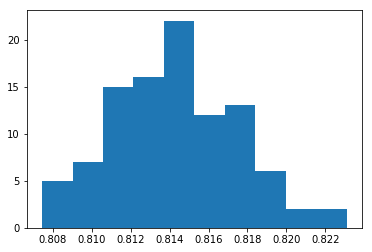

In [17]:
model_accuracies = []

for repetition in range(100):
   (training_inputs,
    testing_inputs,
    training_income,
    testing_income) = train_test_split(all_inputs, all_labels, test_size=0.25)

   decision_tree_classifier = DecisionTreeClassifier()
   decision_tree_classifier.fit(training_inputs, training_income)
   classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_income)
   model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies)
;

In [27]:
from sklearn.metrics import accuracy_score

dt_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                              max_depth=5, min_samples_leaf=5)
dt_clf_gini.fit(training_inputs, training_income)
### Desicion Tree with Information Gain ###

dt_clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
max_depth=5, min_samples_leaf=5)

dt_clf_entropy.fit(training_inputs, training_income)

y_pred_gini = dt_clf_gini.predict(testing_inputs)
y_pred_en = dt_clf_entropy.predict(testing_inputs)

print ("Desicion Tree using Gini Index\nAccuracy is ", accuracy_score(testing_income,y_pred_gini)*100 )
print ("Desicion Tree using Information Gain\nAccuracy is ", accuracy_score(testing_income,y_pred_en)*100 )

Desicion Tree using Gini Index
Accuracy is  83.83856342786025
Desicion Tree using Information Gain
Accuracy is  83.79411503244732


In [28]:
import pickle

In [31]:
pickle.dump(decision_tree_classifier, open("tree_classifier.pkl", "wb"))